In [95]:
class Tree:
    def __init__(self):
        self._value = None
        self._data = None
        self.left = None
        self.right = None

    def add(self, value, data):
        if self._value is None:
            self._value = value
            self._data = data
            return
        
        if value < self._value:
            if self.left is None:
                self.left = Tree()
            self.left.add(value, data)
        elif value > self._value:
            if self.right is None:
                self.right = Tree()
            self.right.add(value, data)
        else:
            self._data = data
        
    def __contains__(self, patient_id):
        if self._value == patient_id:
            return True
        elif self.left and patient_id < self._value:
            return patient_id in self.left
        elif self.right and patient_id > self._value:
            return patient_id in self.right
        else:
            return False
        
    def has_data(self, target) -> bool:
        if self._value is None:
            return False  
        if self._data == target:
            return True
        if self.left and self.left.has_data(target):
            return True
        if self.right and self.right.has_data(target):
            return True      
        return False

In [96]:
# Tests for add
my_tree = Tree()
for patient_id, initials in [(24601, "JV"), (42, "DA"), (7, "JB"), (143, "FR"), (8675309, "JNY")]:
    my_tree.add(patient_id, initials)

# should be (24601, "JV")
print(my_tree._value)
print(my_tree._data)

# should be (42, "DA")
print(my_tree.left._value)
print(my_tree.left._data)

# (8675309, "JNY")
print(my_tree.right._value) 
print(my_tree.right._data) 

# (7, "JB")
print(my_tree.left.left._value)
print(my_tree.left.left._data)

# (143, "FR")
print(my_tree.left.right._value)
print(my_tree.left.right._data)

24601
JV
42
DA
8675309
JNY
7
JB
143
FR


In [97]:
# 4b tests using in (not _contains_)
# Positive tests
print(24601 in my_tree)   # True
print(42 in my_tree)      # True
print(8675309 in my_tree) # True
print(7 in my_tree)       # True
print(143 in my_tree)     # True

# Negative tests
print(1492 in my_tree)    # False
print(1 in my_tree)       # False
print(2333 in my_tree)    # False

# Empty tree test
empty = Tree()
print(0 in empty)         # False

True
True
True
True
True
False
False
False
False


In [98]:
# 4c. Tests for has_data
# Positive tests
print("has_data('JV'):", my_tree.has_data("JV"))     # True
print("has_data('DA'):", my_tree.has_data("DA"))     # True
print("has_data('JB'):", my_tree.has_data("JB"))     # True
print("has_data('FR'):", my_tree.has_data("FR"))     # True
print("has_data('JNY'):", my_tree.has_data("JNY"))   # True

# Negative tests
print("has_data('ABC'):", my_tree.has_data("ABC"))   # False
print("has_data(24601):", my_tree.has_data(24601))   # False (24601 is a key, not a data)

# Empty tree test
empty = Tree()
print("empty.has_data('BALABALA') ->", empty.has_data("BALABALA"))  # False

has_data('JV'): True
has_data('DA'): True
has_data('JB'): True
has_data('FR'): True
has_data('JNY'): True
has_data('ABC'): False
has_data(24601): False
empty.has_data('BALABALA') -> False


In [99]:
# 4d
import time, random, math
import matplotlib.pyplot as plt

def build_random_tree(n):
    keys = random.sample(range(1, 100*n), n)
    tree = Tree()
    for i, k in enumerate(keys):
        tree.add(k, f"Peter{i}")  
    return tree, keys

def time_contains(tree, query_keys):
    start = time.perf_counter()
    hits = 0
    for value in query_keys:
        if value in tree:
            hits += 1
    end = time.perf_counter()
    return (end - start) / len(query_keys), hits

def time_has_data(tree, query_data):
    start = time.perf_counter()
    hits = 0
    for data in query_data:
        if tree.has_data(data):
            hits += 1
    end = time.perf_counter()
    return (end - start) / len(query_data), hits

# experiment begins 
random.seed(123)   
sizes = [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000]
avg_contains = []
avg_has_data = []
setup_times = []


for n in sizes:
    t0 = time.perf_counter()
    tree, keys = build_random_tree(n)
    t1 = time.perf_counter()
    setup_times.append(t1 - t0)

    # queries for __contains__
    m = 1000 # number of queries
    # 500 hits (keys that exist)
    existing = random.sample(keys, k=m//2) 
    # 500 misses (numbers not in keys)
    missing = []
    while len(missing) < m//2:
        x = random.randint(1, 100*n)   
        if x not in keys:             
            missing.append(x)
    
    contains_queries = existing + missing
    random.shuffle(contains_queries)

    # time __contains__
    avg_t_contains, _ = time_contains(tree, contains_queries)
    avg_contains.append(avg_t_contains)

    # queries for has_data
    existing_data = [f"Peter{i}" for i in random.sample(range(n), k=m//2)]
    missing_data = [f"P{i}" for i in range(m//2)]
    has_data_queries = existing_data + missing_data
    random.shuffle(has_data_queries)

    # time has_data
    avg_t_hasdata, _ = time_has_data(tree, has_data_queries)
    avg_has_data.append(avg_t_hasdata)

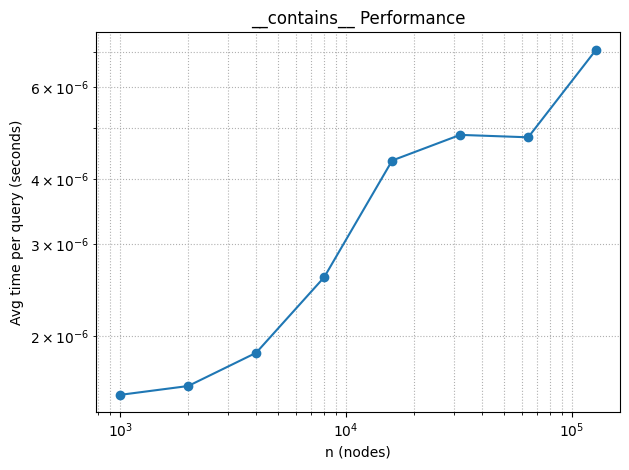

In [100]:
# time plot for __contains__
plt.figure()
plt.loglog(sizes, avg_contains, marker='o', label="__contains__ (key search)")
plt.xlabel("n (nodes)")
plt.ylabel("Avg time per query (seconds)")
plt.title("__contains__ Performance")
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/4d_contains.png", dpi=200)

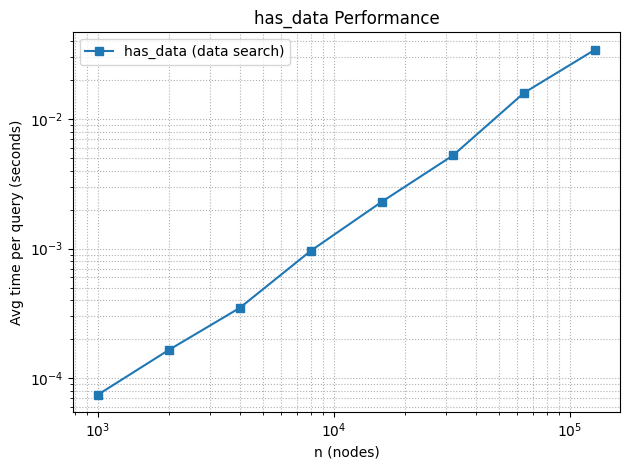

In [101]:
# time plot for has_data
plt.figure()
plt.loglog(sizes, avg_has_data, marker='s', label="has_data (data search)")
plt.xlabel("n (nodes)")
plt.ylabel("Avg time per query (seconds)")
plt.title("has_data Performance")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/4d_has.png", dpi=200)

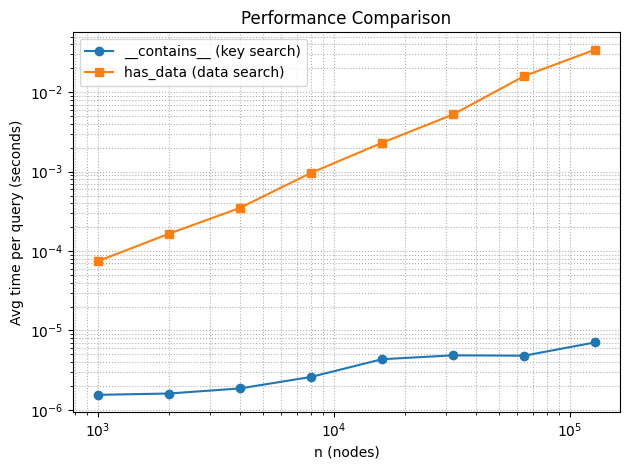

In [102]:
# Comparison plot 
line1, = plt.loglog(sizes, avg_contains, marker='o', label="__contains__ (key search)")
line2, = plt.loglog(sizes, avg_has_data, marker='s', label="has_data (data search)")
plt.xlabel("n (nodes)")
plt.ylabel("Avg time per query (seconds)")
plt.title("Performance Comparison")
plt.legend(handles=[line1, line2]) 
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/4d_compare.png", dpi=200)

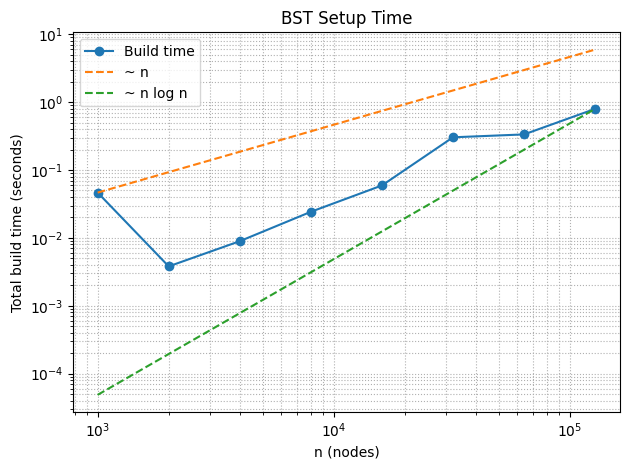

In [103]:
# setup time analysis 
c_lin  = setup_times[0] / sizes[0]                    
c_quad = setup_times[-1] / (sizes[-1] ** 2)   
ref_n     = [c_lin * n for n in sizes]
ref_n2    = [c_quad * (n**2) for n in sizes]

plt.figure()
plt.loglog(sizes, setup_times, marker='o', label="Build time")
plt.loglog(sizes, ref_n, linestyle='--', label="~ n")
plt.loglog(sizes, ref_n2, linestyle='--', label="~ n log n")
plt.xlabel("n (nodes)")
plt.ylabel("Total build time (seconds)")
plt.title("BST Setup Time")
plt.legend()
plt.grid(True, which="both", ls=":")
plt.tight_layout()
plt.savefig("plots/4d_setup.png", dpi=200)